## Model Building - Data Scientist Salary - Glassdoor

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing Dataset

In [2]:
df = pd.read_csv('Data_Science_Salaries_cleaned.csv')
df

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarter,Size,Founded,Type_of_ownership,...,Job_state,same_state,age_of_company,Python,R-studio,spark,Excel,AWS,Seniority_Level,Job_Title_Simplified
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,50,1,0,0,1,0,na,data scientist
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,39,1,0,0,0,0,na,data scientist
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,13,1,0,1,1,0,na,data scientist
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,58,1,0,0,0,0,na,data scientist
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,25,1,0,0,1,0,na,data scientist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",58-111,Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,MA,0,193,0,0,0,0,1,senior,na
738,Senior Data Engineer,72-133,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,TN,0,17,1,0,1,0,1,senior,data engineer
739,"Project Scientist - Auton Lab, Robotics Institute",56-91,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,PA,1,39,0,0,0,1,0,na,na
740,Data Science Manager,95-160,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,PA,0,-1,0,0,0,1,0,na,manager


In [3]:
df.columns

Index(['Job_Title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarter', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'seniority', 'Job_Title_simplified', 'PerHour',
       'employer_Provided_Salary', 'min_salary', 'max_salary',
       'average_salary', 'Job_state', 'same_state', 'age_of_company', 'Python',
       'R-studio', 'spark', 'Excel', 'AWS', 'Seniority_Level',
       'Job_Title_Simplified'],
      dtype='object')

- Choose relevant columns
- Create dummy variables
- One-hot encoding
- Label encoding
- Standardization
- Model Building
- Model Tuning (GridSearchCV)
- Model Evaluation

### Feature Engineering

##### Choose relevant columns

In [4]:
df_model = df[[ 'average_salary', 'Rating','Size','Type_of_ownership', 'Industry', 'Sector', 'Revenue', 
              'seniority', 'Job_Title_simplified', 'PerHour','employer_Provided_Salary', 'Job_state', 'same_state', 'age_of_company', 'Python', 'spark', 'Excel', 'AWS']]
df_model

,average_salary,Rating,Size,Type_of_ownership,Industry,Sector,Revenue,seniority,Job_Title_simplified,PerHour,employer_Provided_Salary,Job_state,same_state,age_of_company,Python,spark,Excel,AWS
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),na,data scientist,0,0,NM,0,50,1,0,1,0
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),na,data scientist,0,0,MD,0,39,1,0,0,0
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),na,data scientist,0,0,FL,1,13,1,1,1,0
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),na,data scientist,0,0,WA,1,58,1,0,0,0
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,na,data scientist,0,0,NY,1,25,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),senior,na,0,0,MA,0,193,0,0,0,1
738,102.5,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),senior,data engineer,0,0,TN,0,17,1,1,0,1
739,73.5,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,na,na,0,0,PA,1,39,0,0,1,0
740,127.5,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),na,manager,0,0,PA,0,-1,0,0,1,0


In [5]:
X = df_model.drop('average_salary', axis=1)
y = df_model['average_salary']

##### One Hot Encoding

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), X.columns)], remainder='passthrough')
X = ct.fit_transform(df_model).toarray()
X

array([[  0. ,   0. ,   0. , ...,   1. ,   0. ,  72. ],
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  87.5],
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  85. ],
       ...,
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  73.5],
       [  0. ,   0. ,   0. , ...,   1. ,   0. , 127.5],
       [  0. ,   0. ,   0. , ...,   1. ,   0. ,  93.5]])

In [7]:
# Drop Last column
X = X[:, :-1]
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [8]:
y  = df_model['average_salary'].values
y

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5,  85. , 139. ,  65.5, 113.5, 146. , 102. , 153.5,
       142.5,  87.5, 105.5,  96. , 112.5,  84. , 143. ,  86.5,  99.5,
        47.5,  84. ,  85. ,  76.5,  96. , 114.5, 121. , 112.5, 106. ,
       107. , 110. , 147.5, 106. ,  88. ,  98.5, 142.5,  82.5, 130. ,
       155. , 184.5,  29.5,  86.5,  81. ,  91. , 114.5,  68. , 115. ,
       109.5,  75.5, 154.5, 143.5,  73.5,  95. , 107. , 115. , 139.5,
        67. ,  85. , 118. ,  79.5,  56.5, 128.5,  97.5,  66.5, 179.5,
        76. , 112. ,  98. , 128. , 150.5,  87.5, 110. , 113.5, 124. ,
        56.5, 130. ,  77.5,  87. ,  53.5, 139. , 114. ,  85.5,  48. ,
        48. , 174. ,  85. , 106.5,  72.5,  85.5,  97.5,  99. ,  56.5,
       133. , 121. ,  85.5,  87.5, 237.5,  95.5, 104.5,  56.5,  55. ,
        61.5, 157. ,  78. , 113.5, 140. , 132.5, 108. ,  80.5, 107.5,
        95. , 119.5, 134. , 100.5, 107.5, 122. ,  92.5,  62. ,  39.5,
       107.5,  40.5,

### Model Building

##### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Statsmodel Regression Model - Fitting a linear model using Ordinary Least Squares

In [10]:
from statsmodels.api import OLS
import statsmodels.api as sm

X = sm.add_constant(X)

model = OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     7.911
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.39e-83
Time:                        00:42:14   Log-Likelihood:                -3136.7
No. Observations:                 742   AIC:                             6811.
Df Residuals:                     473   BIC:                             8051.
Df Model:                         268                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1335      2.512      6.822      0.0

##### Multiple Linear Regression

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

mlr_reg = LinearRegression()
mlr_score = cross_val_score(mlr_reg, X_train, y_train, cv=5)
print(mlr_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (mlr_score.mean(), mlr_score.std()))

[-3.55572497e+21 -6.39409955e+19  2.96061437e-01 -4.52716145e+21
  3.44490925e-02]
-1629365482293296365568.00 accuracy with a standard deviation of 1993404118640177709056.00


##### Lasso Regression

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

lasso_reg = Lasso(tol=0.0001)
lasso_reg.fit(X_train, y_train)
lasso_score = cross_val_score(lasso_reg, X_train, y_train, cv=5)
print(lasso_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (lasso_score.mean(), lasso_score.std()))

[0.43274489 0.41208268 0.45927132 0.470197   0.5368605 ]
0.46 accuracy with a standard deviation of 0.04


((0.01, 0.43915815542236836),
 (0.02, 0.523947389904248),
 (0.03, 0.5470129822158332),
 (0.04, 0.557196126396686),
 (0.05, 0.5641095255841853),
 (0.06, 0.5681288291281794),
 (0.07, 0.5693554291242364),
 (0.08, 0.5695830951747898),
 (0.09, 0.5702494709883351),
 (0.1, 0.5701219196178482),
 (0.11, 0.5698879852650152),
 (0.12, 0.5698902238531065),
 (0.13, 0.5695825300722491),
 (0.14, 0.5690256334189927),
 (0.15, 0.5680292315903269),
 (0.16, 0.5664480637950893),
 (0.17, 0.5647031137037299),
 (0.18, 0.5627258319498194),
 (0.19, 0.5605078566550387),
 (0.2, 0.5581866768059467),
 (0.21, 0.5560121083878914),
 (0.22, 0.5540917430102217),
 (0.23, 0.5525499124184317),
 (0.24, 0.5511052530065192),
 (0.25, 0.549857364088467),
 (0.26, 0.5487230280941532),
 (0.27, 0.547458892898472),
 (0.28, 0.546186739733509),
 (0.29, 0.545030754576522),
 (0.3, 0.543946687638372),
 (0.31, 0.5428601114682747),
 (0.32, 0.541802876117111),
 (0.33, 0.5407679542423709),
 (0.34, 0.5397778187134975),
 (0.35, 0.53877305764361

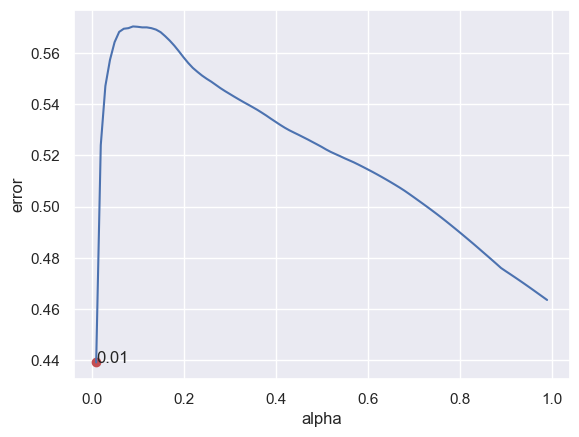

In [13]:
# Plot graph to get min error and most optimized alpha value for Lasso Regression
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lasso_reg = Lasso(alpha=(i/100), tol=0.0001)
    lasso_reg.fit(X_train, y_train)
    error.append(np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=5)))
    
plt.plot(alpha, error)
plt.xlabel('alpha')
plt.ylabel('error')

err = min(error)
optimal_alpha = alpha[error.index(err)]
plt.scatter(optimal_alpha, err, c='r')
plt.text(optimal_alpha, err, optimal_alpha)

error_tuple = tuple(zip(alpha, error))
error_tuple

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.01, tol=0.0001) 
lasso_score = cross_val_score(lasso_reg, X_train, y_train, cv=5)
print(lasso_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (lasso_score.mean(), lasso_score.std()))

[0.37942284 0.44559336 0.5708355  0.38150675 0.41843233]
0.44 accuracy with a standard deviation of 0.07


##### Random Forest Regression

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_score = cross_val_score(rf_reg, X_train, y_train, cv=5)
print(rf_score)
print("%0.2f accuracy with a standard deviation of %0.2f" % (rf_score.mean(), rf_score.std()))

[0.66834134 0.64189676 0.6687388  0.74173327 0.77944264]
0.70 accuracy with a standard deviation of 0.05


### Model Tuning - Grid Search

In [16]:
# GridSearchCV - Random Forest Regression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

grid = dict()
grid['n_estimators'] = [10, 50, 100, 300]
grid['max_depth'] = [None, 5, 10, 20]
grid['min_samples_split'] = [2, 5, 10]
grid['min_samples_leaf'] = [1, 2, 4]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_reg, param_grid=grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error', error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -439.377660 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
-509.068952 (118.513399) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
-461.243526 (105.213572) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-444.584449 (107.364385) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
-439.377660 (100.050669) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
-526.342734 (105.080410) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
-464.264129 (106.602181) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
-459.839976 (104.158535) with: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
-458.948785 (102.859094) with: {'max_depth': None, 'min_sam

In [17]:
grid_result.best_params_, grid_result.best_score_

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 -439.37766022739834)

In [18]:
# Implement best GridSearchCV results

rf_reg = RandomForestRegressor(max_depth=None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 300)
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.7853753759928466

##### Model Evaluation

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
print('R2 score [Training]: ', r2_score(y_train, rf_reg.predict(X_train)))
print('R2 score [Testing]: ', r2_score(y_test, rf_reg.predict(X_test)))

print('Mean Squared Error [Training]: ', mean_squared_error(y_train, rf_reg.predict(X_train)))
print('Mean Squared Error [Testing]: ', mean_squared_error(y_test, rf_reg.predict(X_test)))

R2 score [Training]:  0.9557119938798718
R2 score [Testing]:  0.7853753759928466
Mean Squared Error [Training]:  65.25150029842156
Mean Squared Error [Testing]:  350.80635027377934


### Model Deployment

In [20]:
import pickle

with open('model_pickle', 'wb') as file:
    pickle.dump(rf_reg, file)
    
with open('model_pickle', 'rb') as file:
    mp = pickle.load(file)
    
mp.score(X_test, y_test)

0.7853753759928466